## Algoritmo de Dijkstra
José Jorge Martínez de la Cruz

El algoritmo de Dijkstra nos sirve para determinar el camino más corto, dado un vértice inicial, hacia el resto de los vértices en una gráfica con pesos en las aristas. Así, para nuestro nodo inicial $A$, tendremos un vector $D$ que guardará al final del algoritmo las distancias desde $A$ hasta el resto de los nodos.
1. **Inicializar.** Inicializamos todas las distancias en $D$ con un valor infinito menos la de $A$, que se debe colocar en $0$.
2. **Marcar el nodo permanente.** Se toma $A$ como nodo permanente o definitivo.
3. **Idetificar los nodos vecinos disponibles.** Se recorren todos los nodos adyacentes de $A$, excepto los nodos marcados como permanentes y llamamos a los nodos no marcados $v_i$.
4. **Retiquetado.** Para el nodo actual, se calcula la distancia temporal desde ese nodo a sus vecinos. La distancia temporal del vecino $v_i$ es la distancia que actualmente tiene el nodo en el vector $D$ más la distancia desde dicho nodo $A$ (el nodo permanente) hasta el nodo $v_i$. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa.
5. **Actualizar nodo permanente.** Se toma como próximo nodo permanente el de menor valor en $D$ y se regresa al paso 3, mientras existan nodos no marcados.

**Observaciones.**
- **$MD.$** Una matriz de costos de las aristas del grafo, donde en $MD[u,v]$ se almacena el costo de la arista entre $u$ y $v$.
- **$ED.$** Conjunto que contendrá los vértices para los cuales ya se tiene determinado el camino mínimo.
- $D.$ Un arreglo unidimensional tal que $D[v]$ es el costo del camino mínimo del vértice origen al vértice $v$.
- $O.$ Un arreglo unidimensional tal que $P[v]$ es el vértice predecesor de $v$ en el camino mínimo que se tiene construido.

### Ejercicio 1
Programa una función que reciba la matriz de pesos de una gráfica y el nodo inicial y que aplique el algoritmo de Dijkstra. Tu función debe regresar una lista con las distancias de las rutas y el origen de la arista con la que terminó la ruta.

Comandos útiles de numpy:
- ```np.shape(Matriz)```
- ```np.inf```
- ```np.zeros(n)```
- ```np.ones(n)```
- ```np.where(condicion)```
- ```np.min(lista)```

Comandos útiles de python:
- ```dict.fromkeys(lista)```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Dijkstra(MD,e):
    n,n = MD.shape

    # Estados que estoy visitando y son modificables
    E = []

    # Estados Definitivos
    ED = []

    # Origen de la arista
    O = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #En un principio es como decir, no vengo de ningún nodo

    # Distancia de la ruta
    D = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #Poner la distacia a cualquier nodo es infinito

    #PASO 1
    # Inicialización
    O[e] = e
    D[e] = 0
    E.append(e)

    # Mientras que aún no tengas la ruta mas corta a todos los puntos
    while len(ED) < n:

        #PASO 2
        # Agregar e como definitivo
        ED.append(e)

        #PASO 3
        # Busca a los vecinos de tu nodo e
        uindex = np.where(MD[e,]!=0)[0]

        #PASO 4
        # Si no esta en tus nodos definitivos y es vecino ent
        # checa si su distancia puede ser mejorada.
        for i in uindex:
            if i not in ED:
                E.append(i)
                if D[e] + MD[e,i] < D[i]:
                    D[i] = D[e] + MD[e,i]
                    O[i] = e

        # Quitarlo de la otra lista
        E.remove(e)

        # Quitar repetidos
        E = list(dict.fromkeys(E))
        #ED = list(dict.fromkeys(ED))

        #Paso 5
        # Ya tenemos todos?
        if len(ED) == n:
            break

        # Buscamos al siguiente nodo e con la mínima distancia hasta ahora.
        m = np.min(D[E])
        index = np.where(D==m)[0]
        for i in index:
            if i in E:
                e = i
    return D,O

### Ejercicio 2
Ahora, usando las listas generadas por tu función del algoritmo de Dijkstra, programa una función que encuentre el camino óptimo entre dos vértices.

In [ ]:
from networkx.algorithms.centrality.percolation import dijkstra
def Camino(matríz,inicio,final): #La función que nos dará el camino más corto recibirá la matríz de pesos, el vértice de incio y el de final
  pesos, vertices = Dijkstra(matríz, inicio) #Guardamos los datos de las listas en variables distintas
  camino_corto = [] # El algoritmo regresará la lista con los vértices a seguir para encontrar el camino más corto
  peso = pesos[final] #Y el peso mínimo (proporcionado por la función anterior)
  final_1 = final  #Definimos el nodo del final y se aplicará la función anterior
  while final_1 != inicio: #Mientras no hayamos llegado al inicio
    camino_corto.append(int(final_1)) #Introducimos el nodo final a la lista de vértices
    final_1 = vertices[int(final_1)] #Nos iremos en busca del vértice anterior y ese será nuestro nuevo nodo final
  camino_corto.append(inicio) #Finalmente, agregamos el nodo incial
  camino_corto = list(reversed(camino_corto)) #Como ha sido un método recursivo, invertimos la lista
  return camino_corto, peso #Regresamos la lista y el peso

### Ejercicio 3
Prueba tus funciones con las siguientes matrices de pesos, empezando siempre en el nodo 0.</br>
También usa la libreria ``networkx`` para crear las graficas.</br>
**Nota :** Donde encuentres un cero quiere decir que no existe una arista entre dichos vertices </br>
**Gráfica 1**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
2 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 7 & 4 & 6 & 0 & 0 & 0\\
0 & 0 & 0 & 3 & 2 & 4 & 0 & 0 & 0\\
0 & 0 & 0 & 4 & 1 & 5 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 4 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 6 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4
\end{bmatrix}

In [ ]:
M1 = np.zeros((9,9)) #Creamos la matríz únicamente agregando los valores faltantes
M1[0,0:3] = 2, 4, 3
M1[1, 3:6] = 7, 4, 6
M1[2, 3:6] = 3, 2, 4
M1[3, 3:6] = 4, 1, 5
M1[4, 6:8] = 1, 4
M1[5, 6:8] = 6, 3
M1[6, 6:8] = 3, 3
M1[7, 8] = 3
M1[8, 8] = 4
M1 #Corroboramos que los datos coinciden

array([[2., 4., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 7., 4., 6., 0., 0., 0.],
       [0., 0., 0., 3., 2., 4., 0., 0., 0.],
       [0., 0., 0., 4., 1., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 4., 0.],
       [0., 0., 0., 0., 0., 0., 6., 3., 0.],
       [0., 0., 0., 0., 0., 0., 3., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4.]])

In [ ]:
Camino(M1, 0, 7) #El algoritmo nos proporciona el camino más corto que tenemos que seguir

([0, 2, 4, 7], 9.0)

El algortimo nos ha proporcionadoe el camino más corto u óptimo a seguir para llegar desde un vértice inicial a un vértice final, veamos que podemos gráficarlo. Llegando desde el vértice inicial $0 = A$ al vértice final $7 = H$

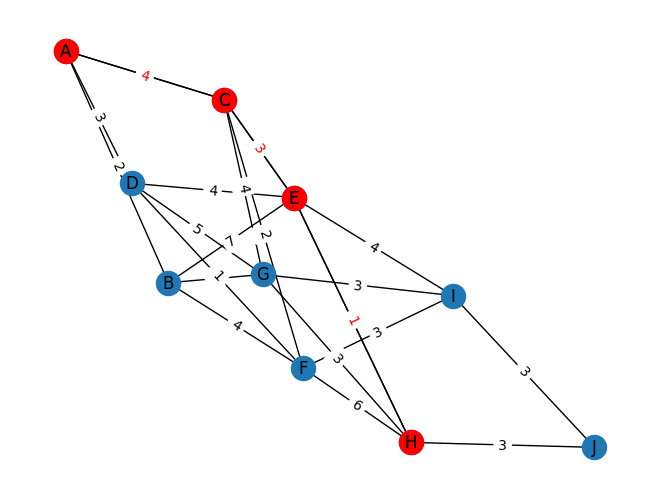

In [ ]:
import networkx as nx
aristas = {'A':[['B','C','D'],[2,4,3]],
           'B':[['E','F','G'],[7,4,6]],
           'C':[['E','F','G'],[3,2,4]],
           'D':[['E','F','G'],[4,1,5]],
           'E':[['H','I'],[1,4]],
           'F':[['H','I'],[6,3]],
           'G':[['H','I'],[3,3]],
           'H':[['J'],[3]],
           'I':[['J'],[3]]}
G = nx.Graph()
V = list(aristas.keys())
for i in range(len(V)):
    for j in range(len(aristas[V[i]][0])):
        G.add_edge(V[i],aristas[V[i]][0][j],weight= aristas[V[i]][1][j])

aristas_1 = {'A':[['C'],[4]], #Con ayuda del algortimo, únicamente, creamos una nueva lista
           'C':[['E'],[3]], #De nodos y un camino que los une
           'E':[['H'],[1]]}
G_1= nx.Graph()
V_1 = list(aristas_1.keys())
for i in range(len(V_1)):
    for j in range(len(aristas_1[V_1[i]][0])):
        G_1.add_edge(V_1[i],aristas_1[V_1[i]][0][j],weight= aristas_1[V_1[i]][1][j])
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True)
options = {'node_color': 'red',
           'edge_color': 'black'}
nx.draw(G_1, pos, with_labels=True, **options) #Estas opciones son para el camino más corto
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)} #Usaremos el comando dos veces pues pintamos de dos colores diferentes
labels_1 = {(u,v): d['weight'] for (u,v,d) in G_1.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color= "black")
nx.draw_networkx_edge_labels(G_1, pos, edge_labels=labels_1, font_color= "red", )
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica1.png")

plt.show()

**Gráfica 2**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
0 & 3 & 0 & 2 & 0 & 0 & 0 & 0\\
3 & 0 & 1 & 0 & 4 & 0 & 0 & 0\\
0 & 1 & 0 & 3 & 0 & 2 & 2 & 0\\
2 & 0 & 3 & 0 & 0 & 0 & 4 & 0\\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 6\\
0 & 0 & 2 & 0 & 0 & 0 & 3 & 4\\
0 & 0 & 2 & 4 & 0 & 3 & 0 & 5\\
0 & 0 & 0 & 0 & 6 & 4 & 5 & 0
\end{bmatrix}

In [ ]:
M2 = np.zeros((8,8)) #De manera análoga, creamos la matríz y añadimos los valores faltantes
M2[0, 1:4] = 3, 0, 2
M2[1, 0:5] = 3, 0, 1, 0, 4
M2[2, 1:7] = 1, 0, 3, 0, 2, 2
M2[3, 0] = 2
M2[3, 2] = 3
M2[3, 6] = 4
M2[4, 1] = 4
M2[4, 7] = 6
M2[5, 2] = 2
M2[5, 6:8] = 3, 4
M2[6, 2:6] = 2, 4, 0, 3
M2[6, 7] = 5
M2[7, 4:7] = 6, 4, 5
M2

array([[0., 3., 0., 2., 0., 0., 0., 0.],
       [3., 0., 1., 0., 4., 0., 0., 0.],
       [0., 1., 0., 3., 0., 2., 2., 0.],
       [2., 0., 3., 0., 0., 0., 4., 0.],
       [0., 4., 0., 0., 0., 0., 0., 6.],
       [0., 0., 2., 0., 0., 0., 3., 4.],
       [0., 0., 2., 4., 0., 3., 0., 5.],
       [0., 0., 0., 0., 6., 4., 5., 0.]])

In [ ]:
Camino(M2, 3, 4) #Imprimimos el camino

([3, 2, 1, 4], 8.0)

Veamos que el camino que nos propone el algoritmo para llegar del nodo $3 = D$ al nodo $4 = E$ es el siguiente

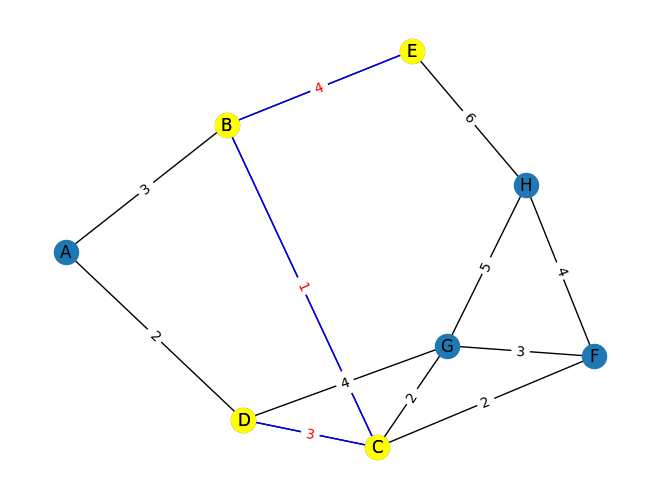

In [ ]:
aristas = {'A':[['B','D'],[3,2]], #Graficamos creando una nueva gráfica donde se distingan los valores diferentes del camino
           'B':[['A','C','E'],[3,1,4]],
           'C':[['B','D','F', 'G'],[1,3,2,2]],
           'D':[['A','C','G'],[2,3,4]],
           'E':[['B','H'],[4,6]],
           'F':[['C','G', 'H'],[2,3, 4]],
           'G':[['C','D', 'F', 'H'],[2,4,3,5]],
           'H':[['E', 'F', 'G'],[6, 4, 5]]}
G = nx.Graph()
V = list(aristas.keys())
for i in range(len(V)):
    for j in range(len(aristas[V[i]][0])):
        G.add_edge(V[i],aristas[V[i]][0][j],weight= aristas[V[i]][1][j])

aristas_1 = {'D':[['C'],[3]], #Con ayuda del algortimo, únicamente, creamos una nueva lista
           'C':[['B'],[1]], #De nodos y un camino que los une
           'B':[['E'],[4]]}
G_1= nx.Graph()
V_1 = list(aristas_1.keys())
for i in range(len(V_1)):
    for j in range(len(aristas_1[V_1[i]][0])):
        G_1.add_edge(V_1[i],aristas_1[V_1[i]][0][j],weight= aristas_1[V_1[i]][1][j])


# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True)
options = {'node_color': 'yellow',
           'edge_color': 'blue'}
nx.draw(G_1, pos, with_labels=True, **options) #Estas opciones son para el camino más corto
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
labels_1 = {(u,v): d['weight'] for (u,v,d) in G_1.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edge_labels(G_1, pos, edge_labels=labels_1, font_color= "red", )
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica1.png")
plt.show()

**Gráfica 3**</br>
Ahora tenemos una gráfica dirigida.</br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 9 & 0 & 6\\
0 & 0 & 0 & 1\\
0 & 3 & 0 & 0\\
0 & 0 & 2 & 0
\end{bmatrix}

In [ ]:
M3 = np.zeros((4,4)) #Creamos la matríz con los valores faltantes
M3[0,1] = 9
M3[3,2] = 2
M3[0,3] = 6
M3[1,3] = 1
M3[2,1] = 3


In [ ]:
Camino(M3,0,2) #El camino más corto desde el vertice A hasta el vértice C


([0, 3, 2], 8.0)

De manera analóga, veamos la gráfica y el camino más corto en el caso de una gráfica dirigida.

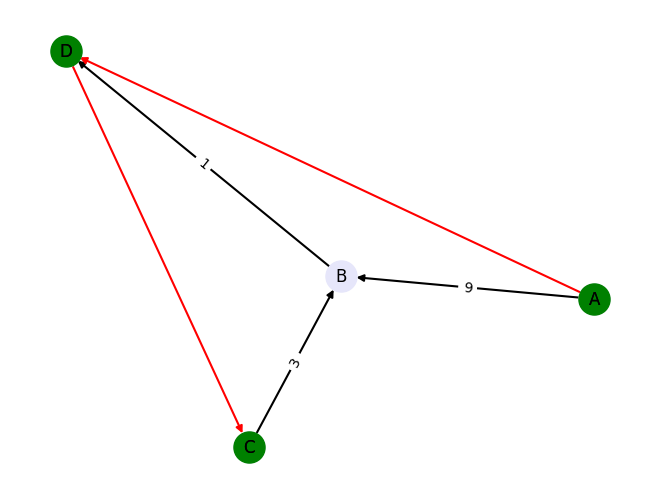

In [ ]:
G = nx.DiGraph()
F = nx.DiGraph()
G.add_edge('A','B',weight= 9)
F.add_edge('A','D',weight= 6)
G.add_edge('B','D',weight= 1)
G.add_edge('C','B',weight= 3)
F.add_edge('D','C',weight= 2)
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Definimos el Estilo de Nuestra Gráfica
options = {'node_color': 'lavender',
           'edge_color': 'black',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
options_1 = {'node_color': 'green',
           'edge_color': 'red',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True, **options)
nx.draw(F, pos, with_labels=True, **options_1)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
labels_1 = {(u,v): d['weight'] for (u,v,d) in F.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edge_labels(F, pos, edge_labels=labels)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica2.png")
plt.show()

**Gráfica 4**</br>
Otra una gráfica dirigida </br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 4 & 8 & 16\\
0 & 0 & 5 & 11\\
0 & 0 & 0 & 6\\
0 & 0 & 0 & 0\\
\end{bmatrix}

In [ ]:
M4 = np.zeros((4, 4)) #Creamos la gráfica con los valores faltantes
M4[0, 1:4] = 4, 8, 16
M4[1, 2:4] = 5, 11
M4[2, 3] = 6
M4

array([[ 0.,  4.,  8., 16.],
       [ 0.,  0.,  5., 11.],
       [ 0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  0.]])

In [ ]:
Camino(M4,0,3) #El camino más corto desde el vértice A hasta el vértice D

([0, 2, 3], 14.0)

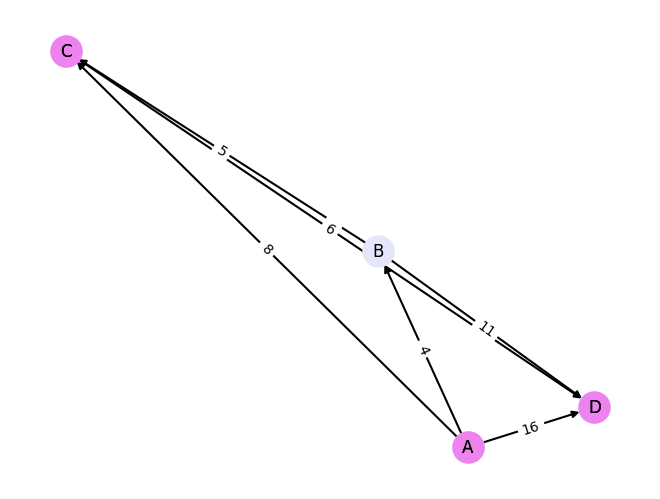

In [ ]:
G = nx.DiGraph()
F = nx.DiGraph()
G.add_edge('A','B',weight= 4)
G.add_edge('A','D',weight= 16)
G.add_edge('B','D',weight= 11)
G.add_edge('B','C',weight= 5)
F.add_edge('C','D',weight= 6)
F.add_edge('A','C',weight= 8)
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Definimos el Estilo de Nuestra Gráfica
options = {'node_color': 'lavender',
           'edge_color': 'black',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
options_1 = {'node_color': 'violet',
           'edge_color': 'black',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True, **options)
nx.draw(F, pos, with_labels=True, **options_1)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
labels_1 = {(u,v): d['weight'] for (u,v,d) in F.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edge_labels(F, pos, edge_labels=labels_1)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica2.png")
plt.show()

## El problema de la mochila

Buscamos maximizar el beneficio de los artículos en la mochila con ciertas restricciones.


|Artículo|Peso|Beneficio|
|:------:|:--:|:-------:|
|1|2kg|65|
|2|3kg|80|
|3|1kg|30|

Teniendo como restircción de peso 5 kg

Buscamos definir la solución de manera recursiva.
### Etapa 1
La primera etapa consistira en maximizar el beneficio con respecto al peso del artículo 1.
$$
f_1(y_1) = \begin{cases}
       0   &\quad\text{si }y_1\in \{0,1\}\\
       65  &\quad\text{si }y_1\in \{2,3\}\\
       130 &\quad\text{si }y_1\in \{4,5\}\\
     \end{cases}
$$

In [ ]:
import math
def f1(y,peso = [2],beneficio = [65],pesoMax = 5): #Hay ciertos valores determinados que pondremos por defecto
    for i in range(pesoMax+1): #Recorrer el rango de pesos
        if y == i: #Hasta encontrar el requerido en la función
            return [beneficio[0]*math.floor(y/peso[0]) , math.floor(y/peso[0])] #Regresa el beneficio que da, dependiendo del articulo
                                                       #Y regresa la cantidad de artículos
for i in range(6): #Imprimir los valores de la función y los artículos correspondientes
    print('f1('+str(i)+')='+str(f1(i,[2],[65],5)[0])+ "\t art1 = "+ str(f1(i,[2],[65],5)[1]))

f1(0)=0	 art1 = 0
f1(1)=0	 art1 = 0
f1(2)=65	 art1 = 1
f1(3)=65	 art1 = 1
f1(4)=130	 art1 = 2
f1(5)=130	 art1 = 2


In [ ]:
f1(3) #Notemos que para hacer uso de la función en la siguiente etapa, únicamente usaremos el beneficio

[65, 1]

### Etapa 2
$$
f_2(y_2)=max_{k_2\leq \left\lfloor\frac{y_2}{w_2}\right\rfloor} \left\{b_2\cdot k_2 + f_1(y_2-w_2k_2)\right\}
$$

$$
f_2(y_2)= max \left\{b_2\cdot k_2 + f_1(y_2-w_2k_2):k_2\leq \left\lfloor\frac{y_2}{w_2}\right\rfloor\right\}
$$

- $y_2$ = peso en artículos al terminar la etapa 2 (tipo1, tipo2)
- $k_2$ = cantidad de artículos de tipo 2
- $w_2$ = peso por unidad de artículos de tipo 2

In [ ]:
def f2 (y2, w2= [3]): #Definimos la función 2, con el peso que varía desde 0 al 5
  b2 = [80] #Análogamente, hay valores por defecto
  k2 = 0 #El contador de cantidad de artículos para calcular el beneficio
  lista = [] #Nos apoyaremos de una lista de beneficios
  articulost1 = [] #Una lista que guarda la cantidad de artículos de tipo 1
  articulost2 = [] #Una lista que guarda la cantidad de artículos de tipo 2
  while k2 <= math.floor(y2/w2[0]): #Mientras no exedamos el peso
    articulost2.append(k2) #Agregar los artículos de tipo 2
    beneficio2 = b2[0]*k2 + f1(y2-w2[0]*k2)[0] #Calculamos el beneficio
    articulost1.append(f1(y2-w2[0]*k2)[1]) #Agregamos los artículos de tipo 1
    lista.append(beneficio2) #Agregamos el beneficio a la lista
    k2 += 1 #Aumentamos en artículos
  s = lista.index(max(lista)) #Ubicamos el índice de los artículos que proporcionan el valor máximo
  return (max(lista), articulost1[s], articulost2[s]) #Regresa el beneficio máximo, y la cantidad de artículos de tipo 1 y de tipo 2


In [ ]:
for i in range (6): #Imprimimos los posibles valores
  print(f"Para {i} kg, tenemos {f2(i)}")

Para 0 kg, tenemos ('beneficio = 0', 'Artículos de tipo 1 = 0', 'Artículos de tipo 2 =  0')
Para 1 kg, tenemos ('beneficio = 0', 'Artículos de tipo 1 = 0', 'Artículos de tipo 2 =  0')
Para 2 kg, tenemos ('beneficio = 65', 'Artículos de tipo 1 = 1', 'Artículos de tipo 2 =  0')
Para 3 kg, tenemos ('beneficio = 80', 'Artículos de tipo 1 = 0', 'Artículos de tipo 2 =  1')
Para 4 kg, tenemos ('beneficio = 130', 'Artículos de tipo 1 = 2', 'Artículos de tipo 2 =  0')
Para 5 kg, tenemos ('beneficio = 145', 'Artículos de tipo 1 = 1', 'Artículos de tipo 2 =  1')


### Etapa 3
$$
f_3(y_3)=max_{k_3\leq \left\lfloor\frac{y_3}{w_3}\right\rfloor} \left\{b_3\cdot k_3 + f_2(y_3-w_3k_3)\right\}
$$

In [ ]:
def f3(y3 = 5, w3 = [1]): #En esta etapa únicamente buscamos el beneficio mayor
  b3 = [30] #Guardamos los valores preterminados
  lista = []
  elementos3 = [] #Veamos que el procedimiento es análogo
  elementos21 = []
  k3 = 0 #Análogamente contamos con el contador
  while k3 <= math.floor(y3/w3[0]):
    elementos3.append(k3)
    beneficio3 = b3[0]*k3 + f2(y3-w3[0]*k3)[0]
    elementos21.append(f2(y3-w3[0]*k3)[1:]) #En este caso guardamos la dupla
    lista.append(beneficio3)
    k3 += 1
  s = lista.index(max(lista)) #Buscalos el índice del máximo
  return (max(lista), elementos21[s][0],elementos21[s][1], elementos3[s]) #Nos regresa el beneficio y el acomodo de los artículos


In [ ]:
print(f"El beneficio máximo en el problema es de {f3()[0]} \n con artículo de tipo 1 = {f3()[1]}, de tipo 2 = {f3()[2]} \n y de tipo 3 = {f3()[3]}")

El beneficio máximo en el problema es de 160 
 con artículo de tipo 1 = 2, de tipo 2 = 0 
 y de tipo 3 = 1
